In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/urls.csv")
data = data.drop(["Domain"],axis = 1)
data.head()

,Unnamed: 0,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,1,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,0
2,2,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
3,3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data.drop(data.columns[data.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',
       'Label'],
      dtype='object')

In [6]:
#except labels, copy the feature names from output of above cell output
y = data.Label
X_cols = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',]
X = data[X_cols]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [7]:
# we train model with different k values and find out the optimal k by visualising the stripplots

K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

for keys, values in scores.items():
    print(keys, ':', values)


2 : [0.9464285714285714, 0.925]
3 : [0.9514285714285714, 0.9366666666666666]
4 : [0.9435714285714286, 0.9416666666666667]
5 : [0.9421428571428572, 0.935]
6 : [0.9392857142857143, 0.9316666666666666]
7 : [0.9421428571428572, 0.9233333333333333]
8 : [0.9407142857142857, 0.9183333333333333]
9 : [0.9392857142857143, 0.9133333333333333]
10 : [0.9385714285714286, 0.92]
11 : [0.94, 0.9183333333333333]
12 : [0.9371428571428572, 0.9166666666666666]
13 : [0.9392857142857143, 0.92]
14 : [0.9342857142857143, 0.9166666666666666]
15 : [0.9335714285714286, 0.915]
16 : [0.9314285714285714, 0.9216666666666666]
17 : [0.9307142857142857, 0.9166666666666666]
18 : [0.92, 0.92]
19 : [0.92, 0.92]
20 : [0.9192857142857143, 0.92]


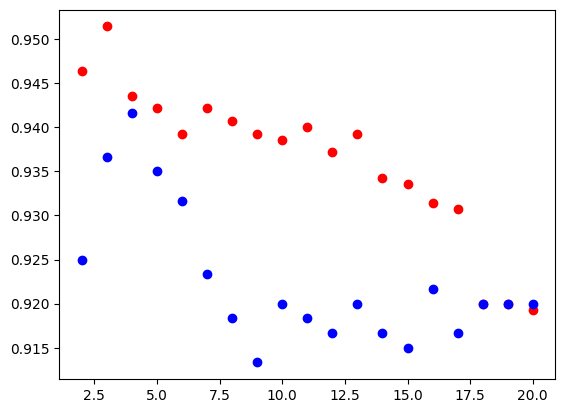

In [8]:
import seaborn as sns
plt.scatter(K, training, color ='red')
plt.scatter(K, test, color ='blue')
plt.show()

In [ ]:
# the optimal k value is 3 where the two graphs are overlapping